<a href="https://colab.research.google.com/github/quvyshnav/Data-Analysis/blob/main/Developer_stack_overflow_survey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install opendatasets --upgrade --quiet

In [ ]:
import opendatasets as od
dataset_url = 'https://cdn.sanity.io/files/jo7n4k8s/production/262f04c41d99fea692e0125c342e446782233fe4.zip/stack-overflow-developer-survey-2024'
od.download(dataset_url)

17711104it [00:03, 5699422.51it/s]                              


In [ ]:
import pandas as pd
import zipfile
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
with zipfile.ZipFile('stack-overflow-developer-survey-2024', 'r') as zip_ref:
    with zip_ref.open('survey_results_public.csv') as f:
      df = pd.read_csv(f)

In [ ]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


In [ ]:
column = df.columns.to_list()
column

['ResponseId',
 'MainBranch',
 'Age',
 'Employment',
 'RemoteWork',
 'Check',
 'CodingActivities',
 'EdLevel',
 'LearnCode',
 'LearnCodeOnline',
 'TechDoc',
 'YearsCode',
 'YearsCodePro',
 'DevType',
 'OrgSize',
 'PurchaseInfluence',
 'BuyNewTool',
 'BuildvsBuy',
 'TechEndorse',
 'Country',
 'Currency',
 'CompTotal',
 'LanguageHaveWorkedWith',
 'LanguageWantToWorkWith',
 'LanguageAdmired',
 'DatabaseHaveWorkedWith',
 'DatabaseWantToWorkWith',
 'DatabaseAdmired',
 'PlatformHaveWorkedWith',
 'PlatformWantToWorkWith',
 'PlatformAdmired',
 'WebframeHaveWorkedWith',
 'WebframeWantToWorkWith',
 'WebframeAdmired',
 'EmbeddedHaveWorkedWith',
 'EmbeddedWantToWorkWith',
 'EmbeddedAdmired',
 'MiscTechHaveWorkedWith',
 'MiscTechWantToWorkWith',
 'MiscTechAdmired',
 'ToolsTechHaveWorkedWith',
 'ToolsTechWantToWorkWith',
 'ToolsTechAdmired',
 'NEWCollabToolsHaveWorkedWith',
 'NEWCollabToolsWantToWorkWith',
 'NEWCollabToolsAdmired',
 'OpSysPersonal use',
 'OpSysProfessional use',
 'OfficeStackAsyncHa

In [ ]:
df.shape

(65437, 114)

In [ ]:
with zipfile.ZipFile('stack-overflow-developer-survey-2024', 'r') as zip_ref:
    with zip_ref.open('survey_results_schema.csv') as f:
      dfs = pd.read_csv(f,index_col=1).question

In [ ]:
dfs.head()

,question
qname,
MainBranch,Which of the following options best describes ...
Age,What is your age?*
Employment,Which of the following best describes your cur...
RemoteWork,Which best describes your current work situation?
Check,Just checking to make sure you are paying atte...


In [ ]:
dfs.shape

(87,)

In [ ]:
dfs['Knowledge_7']

'Waiting on answers to questions often causes interruptions and disrupts my workflow.'

In [ ]:
country = df['Country'].value_counts()
country.head(10)

,count
Country,
United States of America,11095
Germany,4947
India,4231
United Kingdom of Great Britain and Northern Ireland,3224
Ukraine,2672
France,2110
Canada,2104
Poland,1534
Netherlands,1449


In [ ]:
df['Country'].unique()

array(['United States of America',
       'United Kingdom of Great Britain and Northern Ireland', 'Canada',
       'Norway', 'Uzbekistan', 'Serbia', 'Poland', 'Philippines',
       'Bulgaria', 'Switzerland', 'India', 'Germany', 'Ireland', 'Italy',
       'Ukraine', 'Australia', 'Brazil', 'Japan', 'Austria',
       'Iran, Islamic Republic of...', 'France', 'Saudi Arabia',
       'Romania', 'Turkey', 'Nepal', 'Algeria', 'Sweden', 'Netherlands',
       'Croatia', 'Pakistan', 'Czech Republic',
       'Republic of North Macedonia', 'Finland', 'Slovakia',
       'Russian Federation', 'Greece', 'Israel', 'Belgium', 'Mexico',
       'United Republic of Tanzania', 'Hungary', 'Argentina', 'Portugal',
       'Sri Lanka', 'Latvia', 'China', 'Singapore', 'Lebanon', 'Spain',
       'South Africa', 'Lithuania', 'Viet Nam', 'Dominican Republic',
       'Indonesia', 'Kosovo', 'Morocco', 'Taiwan', 'Georgia',
       'San Marino', 'Tunisia', 'Bangladesh', 'Nigeria', 'Liechtenstein',
       'Denmark', 'Ecu

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB


In [ ]:
df.describe()

,ResponseId,CompTotal,WorkExp,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,ConvertedCompYearly,JobSat
count,65437.000000,3.374000e+04,29658.000000,29324.000000,29393.000000,29411.000000,29450.000000,29448.00000,29456.000000,29456.000000,29450.000000,29445.000000,2.343500e+04,29126.000000
mean,32719.000000,2.963841e+145,11.466957,18.581094,7.522140,10.060857,24.343232,22.96522,20.278165,16.169432,10.955713,9.953948,8.615529e+04,6.935041
std,18890.179119,5.444117e+147,9.168709,25.966221,18.422661,21.833836,27.089360,27.01774,26.108110,24.845032,22.906263,21.775652,1.867570e+05,2.088259
min,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000
25%,16360.000000,6.000000e+04,4.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,3.271200e+04,6.000000
50%,32719.000000,1.100000e+05,9.000000,10.000000,0.000000,0.000000,20.000000,15.00000,10.000000,5.000000,0.000000,0.000000,6.500000e+04,7.000000
75%,49078.000000,2.500000e+05,16.000000,22.000000,5.000000,10.000000,30.000000,30.00000,25.000000,20.000000,10.000000,10.000000,1.079715e+05,8.000000
max,65437.000000,1.000000e+150,50.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,1.625660e+07,10.000000


In [ ]:
Prime = ['Country','Age','Gender','EdLevel','UndergradMajor','Hobbyist','Age1stCode','YearsCode','YearsCodePro','LanguageWorkedWith','LanguageDesireNextYear','NEWLearn','NEWStuck','Employment','DevType','WorkWeekHrs','JobSat','JobFactors','NewOvertime','NEWEdImpt']

In [ ]:
for i in Prime:
  if i not in column:
    print(i)

Gender
UndergradMajor
Hobbyist
Age1stCode
LanguageWorkedWith
LanguageDesireNextYear
NEWLearn
NEWStuck
WorkWeekHrs
JobFactors
NewOvertime
NEWEdImpt


In [ ]:
column

['ResponseId',
 'MainBranch',
 'Age',
 'Employment',
 'RemoteWork',
 'Check',
 'CodingActivities',
 'EdLevel',
 'LearnCode',
 'LearnCodeOnline',
 'TechDoc',
 'YearsCode',
 'YearsCodePro',
 'DevType',
 'OrgSize',
 'PurchaseInfluence',
 'BuyNewTool',
 'BuildvsBuy',
 'TechEndorse',
 'Country',
 'Currency',
 'CompTotal',
 'LanguageHaveWorkedWith',
 'LanguageWantToWorkWith',
 'LanguageAdmired',
 'DatabaseHaveWorkedWith',
 'DatabaseWantToWorkWith',
 'DatabaseAdmired',
 'PlatformHaveWorkedWith',
 'PlatformWantToWorkWith',
 'PlatformAdmired',
 'WebframeHaveWorkedWith',
 'WebframeWantToWorkWith',
 'WebframeAdmired',
 'EmbeddedHaveWorkedWith',
 'EmbeddedWantToWorkWith',
 'EmbeddedAdmired',
 'MiscTechHaveWorkedWith',
 'MiscTechWantToWorkWith',
 'MiscTechAdmired',
 'ToolsTechHaveWorkedWith',
 'ToolsTechWantToWorkWith',
 'ToolsTechAdmired',
 'NEWCollabToolsHaveWorkedWith',
 'NEWCollabToolsWantToWorkWith',
 'NEWCollabToolsAdmired',
 'OpSysPersonal use',
 'OpSysProfessional use',
 'OfficeStackAsyncHa

In [ ]:
df['Age'].value_counts()

,count
Age,
25-34 years old,23911
35-44 years old,14942
18-24 years old,14098
45-54 years old,6249
55-64 years old,2575
Under 18 years old,2568
65 years or older,772
Prefer not to say,322


In [ ]:
df['Age'].replace('Prefer not to say',np.nan,inplace=True)
df['Age'].value_counts()

<ipython-input-23-c9ba233a1813>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].replace('Prefer not to say',np.nan,inplace=True)


,count
Age,
25-34 years old,23911
35-44 years old,14942
18-24 years old,14098
45-54 years old,6249
55-64 years old,2575
Under 18 years old,2568
65 years or older,772


In [ ]:
df = df[df['Age'].notna()]
df.shape

(65115, 114)

In [ ]:
age_map = {
    'Under 18 years old':'16',
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70,
}

df['Age'] = df['Age'].map(age_map)

In [ ]:
df['YearsCodePro'].value_counts(ascending=True)

,count
YearsCodePro,
47,10
49,11
48,14
50,14
46,20
43,35
44,42
More than 50 years,46
41,51


In [ ]:
df['YearsCode'].value_counts()

,count
YearsCode,
10,4551
5,3701
6,3479
8,3444
7,3326
4,3271
15,2808
20,2626
12,2556


In [ ]:
df['YearsCodePro'] = df['YearsCodePro'].replace('Less than 1 year', '0')
df['YearsCodePro'] = df['YearsCodePro'].replace('More than 50 years', '51')

In [ ]:
df['YearsCode'] = df['YearsCode'].replace({
    'Less than 1 year':0,
    'More than 50 years':51
}).astype(float)
df.shape

(65115, 114)

In [ ]:
df['EdLevel'].value_counts()

,count
EdLevel,
"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",24883
"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",15518
Some college/university study without earning a degree,7632
"Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",5757
"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",2937
"Associate degree (A.A., A.S., etc.)",1788
Primary/elementary school,1125
Something else,866


In [ ]:
ed_level = df['EdLevel'].unique().tolist()

In [ ]:

df['EdLevel_Simple'] = df['EdLevel'].replace({
    "Bachelor’s degree (B.A., B.S., B.Eng., etc.)":"Graduate",
    "Master’s degree (M.A., M.S., M.Eng., MBA, etc.)":"PG",
    "Some college/university study without earning a degree":"No Degree",
    "Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)":"UG",
    "Professional degree (JD, MD, Ph.D, Ed.D, etc.)":"Professional",
    "Associate degree (A.A., A.S., etc.)":"Associate",
    "Primary/elementary school":"Primary",
    "Something else":"NA"
})

In [ ]:
df['ConvertedCompYearly'].value_counts(ascending=False)

,count
ConvertedCompYearly,
64444.0,320
53703.0,308
75184.0,230
85925.0,226
107406.0,208
...,...
4019.0,1
175500.0,1
101896.0,1


In [ ]:
df = df[df['ConvertedCompYearly'].notna()]

In [ ]:
df = df[df['ConvertedCompYearly']<=500000]

In [ ]:
df.reset_index(inplace=True)

In [ ]:
df.shape

(23301, 116)

In [ ]:
country_imp = ['United States of America', 'Germany', 'India',
    'United Kingdom of Great Britain and Northern Ireland', 'Ukraine',
    'Canada', 'France', 'Poland', 'Netherlands', 'Brazil']

In [ ]:
df['RemoteWork'].value_counts()

,count
RemoteWork,
"Hybrid (some remote, some in-person)",9851
Remote,9532
In-person,3910


In [ ]:
df['RemoteWork'] = df['RemoteWork'].replace({
   'Hybrid (some remote, some in-person)':'Hybrid',
   'In-person':'In-Person',
   'Remote':'Remote'
})

In [ ]:
df.RemoteWork.value_counts()

,count
RemoteWork,
Hybrid,9851
Remote,9532
In-Person,3910


In [ ]:
learning_cols = ['LearnCode','LearnCodeOnline']

In [ ]:
for col in learning_cols:
  print(col)
  print(df[col].isna().sum())
  print(df[col].value_counts())

LearnCode
32
LearnCode
Other online resources (e.g., videos, blogs, forum, online community)                                                                                                                                                     1081
Books / Physical media;Other online resources (e.g., videos, blogs, forum, online community);Online Courses or Certification                                                                                               905
Books / Physical media;Other online resources (e.g., videos, blogs, forum, online community)                                                                                                                               849
Books / Physical media;On the job training;Other online resources (e.g., videos, blogs, forum, online community);School (i.e., University, College, etc);Online Courses or Certification                                   847
Other online resources (e.g., videos, blogs, forum, online community);School (i.e., U

In [ ]:
for col in learning_cols:
  df[col] = df[col].fillna("")

for col in learning_cols:
  df[col] = df[col].str.strip()

df.shape

(23301, 116)

In [ ]:
country_comp = df[df['Country'].isin(country_imp)].groupby('Country')['ConvertedCompYearly'].median().sort_values(ascending=False)

In [ ]:
glob_med = df['ConvertedCompYearly'].median()

<ipython-input-47-819f7d5937f0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=country_comp.index, x=country_comp.values,palette='rocket')


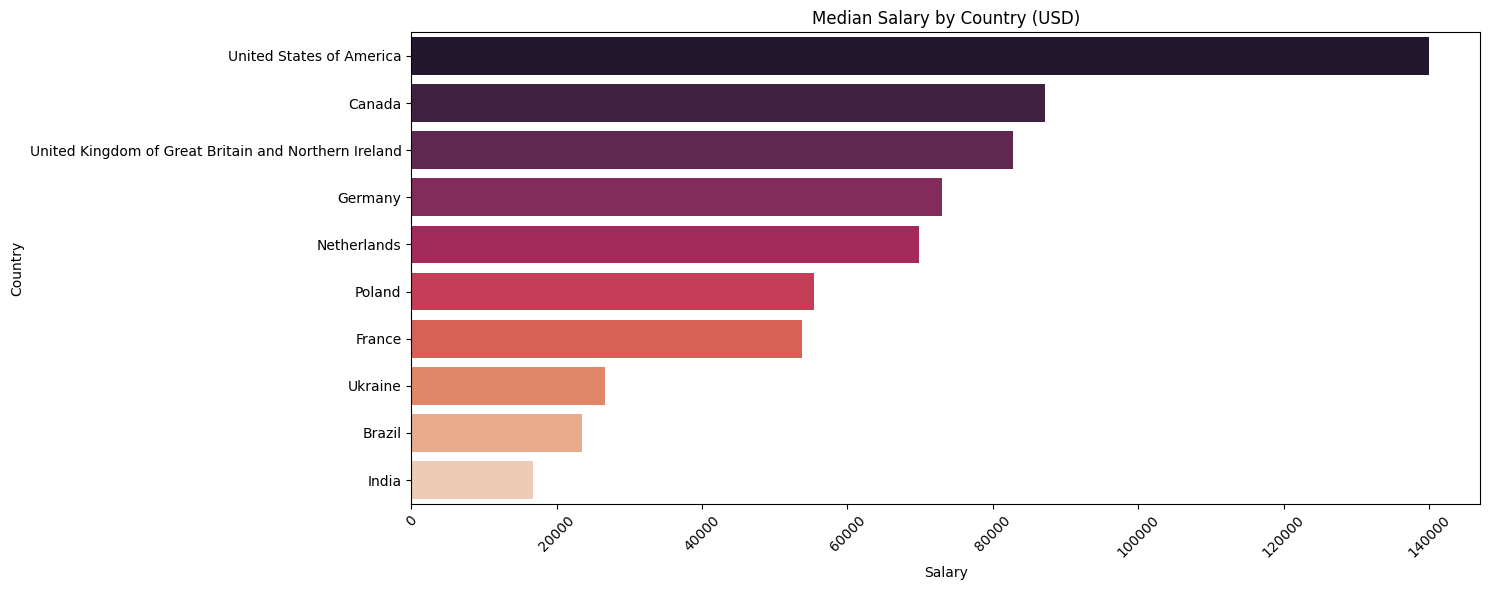

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(y=country_comp.index, x=country_comp.values,palette='rocket')
plt.ylabel('Country')
plt.xlabel('Salary')
plt.title('Median Salary by Country (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
box = df[df['Country'].isin(country_imp)]
box

,index,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,...,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat,EdLevel_Simple
3,385,386,I am a developer by profession,39.5,"Independent contractor, freelancer, or self-em...",Remote,Apples,Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;On the job training;Oth...,...,NaN,NaN,NaN,NaN,NaN,Too short,Easy,53703.0,NaN,PG
4,389,390,I am a developer by profession,29.5,"Employed, full-time;Student, part-time",Remote,Apples,Hobby;School or academic work,Some college/university study without earning ...,Books / Physical media;Colleague;On the job tr...,...,30.0,5.0,20.0,10.0,5.0,Too long,Easy,110000.0,10.0,No Degree
5,392,393,I am a developer by profession,39.5,"Employed, full-time",Hybrid,Apples,Hobby;Contribute to open-source projects,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",Books / Physical media,...,5.0,10.0,0.0,0.0,5.0,Appropriate in length,Neither easy nor difficult,161044.0,7.0,Professional
6,395,396,I am a developer by profession,49.5,"Employed, full-time",Remote,Apples,Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;On the job training;Oth...,...,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,121018.0,NaN,PG
7,398,399,I am a developer by profession,49.5,"Employed, full-time",Remote,Apples,Hobby;Other (please specify):,Some college/university study without earning ...,Books / Physical media;Colleague;On the job tr...,...,10.0,30.0,0.0,0.0,0.0,Appropriate in length,Easy,195000.0,5.0,No Degree
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23292,41174,41175,I am a developer by profession,21,"Employed, full-time",Remote,Apples,Professional development or self-paced learnin...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",On the job training;Other online resources (e....,...,0.0,0.0,0.0,0.0,0.0,Too long,Neither easy nor difficult,9571.0,6.0,Graduate
23295,41179,41180,I am a developer by profession,29.5,"Employed, full-time;Employed, part-time",Remote,Apples,Contribute to open-source projects;Bootstrappi...,Some college/university study without earning ...,Books / Physical media;On the job training;Oth...,...,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,15600.0,NaN,No Degree
23297,41184,41185,I am a developer by profession,49.5,"Employed, full-time",Hybrid,Apples,Hobby;Contribute to open-source projects;Freel...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Other online resources ...,...,10.0,20.0,15.0,0.0,0.0,Appropriate in length,Easy,170000.0,9.0,PG
23298,41185,41186,I am a developer by profession,39.5,"Employed, full-time",Remote,Apples,Hobby;Other (please specify):,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",...,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,116844.0,NaN,Graduate


<ipython-input-49-1e13abe85382>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country',y='ConvertedCompYearly',data=box,palette='Spectral')


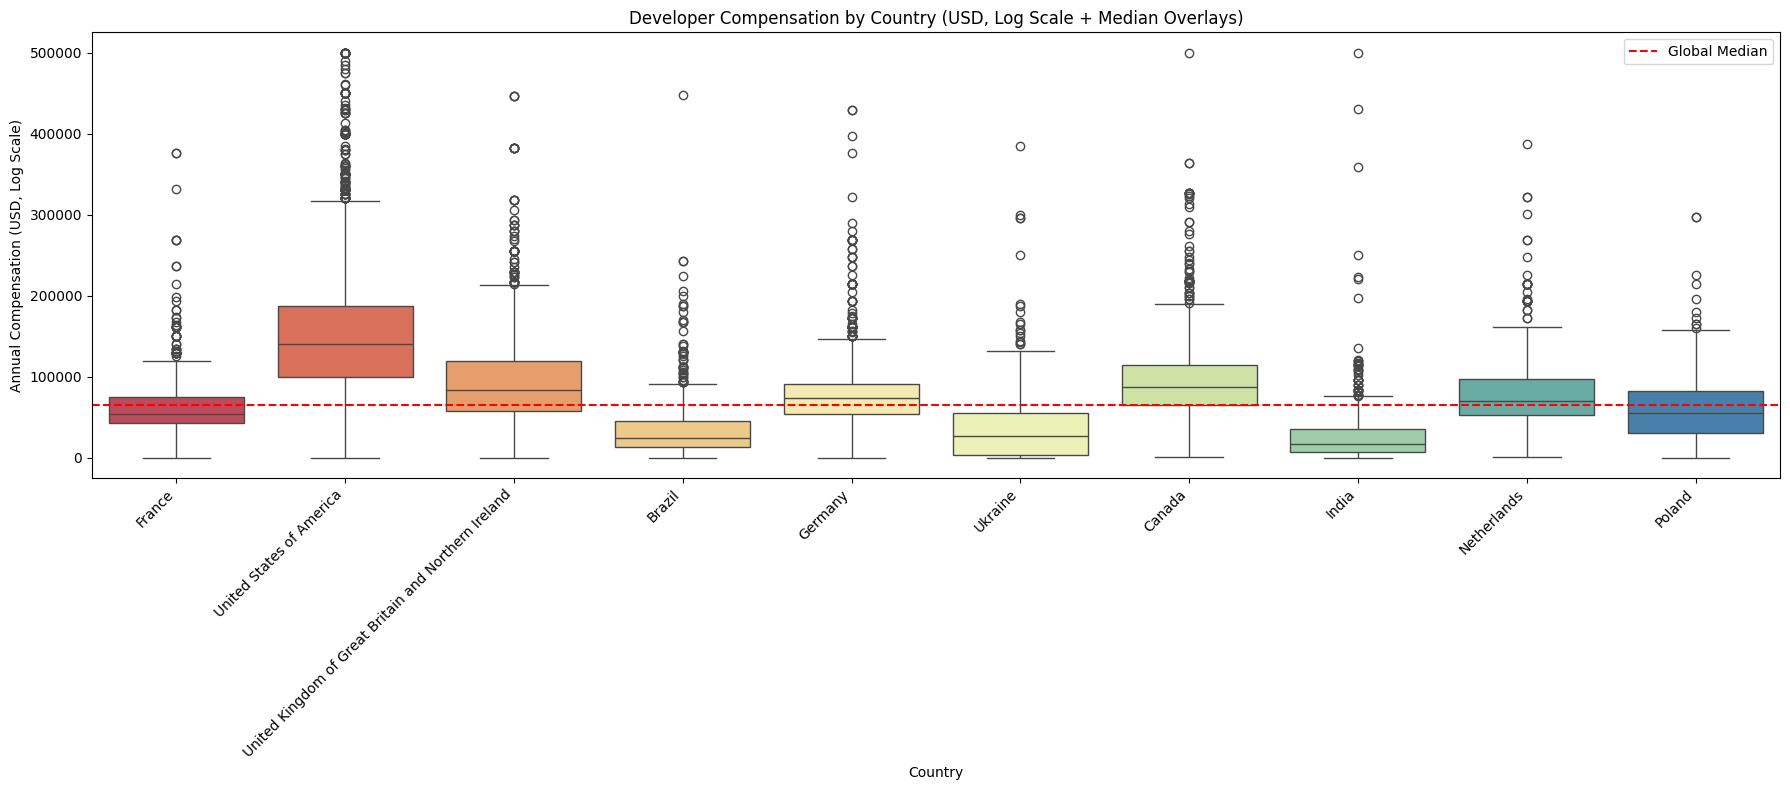

In [ ]:
plt.figure(figsize=(18,8))
sns.boxplot(x='Country',y='ConvertedCompYearly',data=box,palette='Spectral')

#plt.yscale('log')
#plt.ylim(1000,100000)

plt.axhline(glob_med, color='red', linestyle='--', label='Global Median')

plt.title("Developer Compensation by Country (USD, Log Scale + Median Overlays)")
plt.xlabel("Country")
plt.ylabel("Annual Compensation (USD, Log Scale)")
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

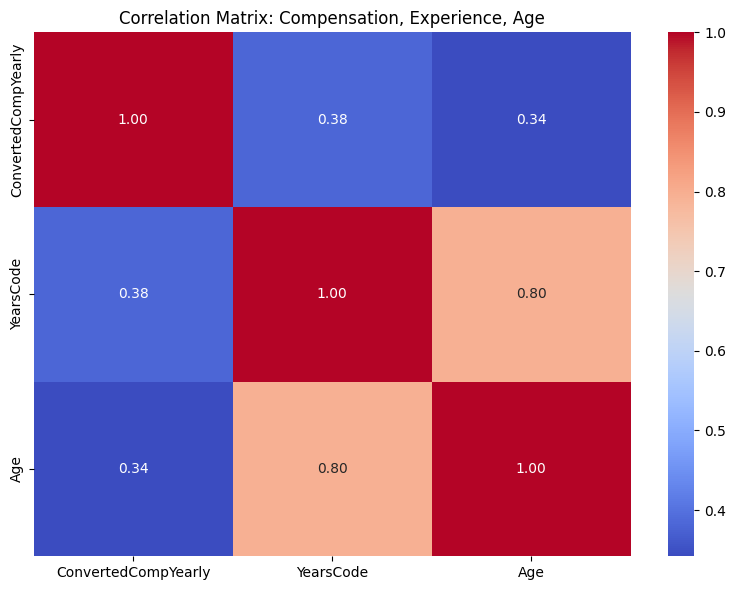

In [ ]:
numeric_features = ['ConvertedCompYearly', 'YearsCode', 'Age']
corr = df[numeric_features].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix: Compensation, Experience, Age")
plt.tight_layout()
plt.show()

In [ ]:
categorical_features = ['RemoteWork', 'EdLevel_Simple', 'Country', 'MainBranch']

df_encode = pd.get_dummies(df[categorical_features], drop_first=True)
print(df_encode.shape)
df_encode.head()

(23301, 174)


,RemoteWork_In-Person,RemoteWork_Remote,EdLevel_Simple_Graduate,EdLevel_Simple_NA,EdLevel_Simple_No Degree,EdLevel_Simple_PG,EdLevel_Simple_Primary,EdLevel_Simple_Professional,EdLevel_Simple_UG,Country_Albania,...,Country_United Republic of Tanzania,Country_United States of America,Country_Uruguay,Country_Uzbekistan,"Country_Venezuela, Bolivarian Republic of...",Country_Viet Nam,Country_Yemen,Country_Zambia,Country_Zimbabwe,"MainBranch_I am not primarily a developer, but I write code sometimes as part of my work/studies"
0,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,True,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False


In [53]:
df['Country'] = df['Country'].where(
    df['Country'].isin(country_imp), 'Other'
)
df_encode = pd.get_dummies(df,columns=['RemoteWork','EdLevel_Simple','Country'],drop_first=True)
df_encode.shape

(23301, 132)

In [54]:
df.columns

Index(['index', 'ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork',
       'Check', 'CodingActivities', 'EdLevel', 'LearnCode',
       ...
       'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9', 'JobSatPoints_10',
       'JobSatPoints_11', 'SurveyLength', 'SurveyEase', 'ConvertedCompYearly',
       'JobSat', 'EdLevel_Simple'],
      dtype='object', length=116)

In [56]:
# Final encoded DataFrame
print("Encoding Complete With Encoded Dataset Shape:", df_encode.shape)

# Final columns added from one-hot
encoded_cols = [col for col in df_encode.columns
                if 'RemoteWork_' in col or 'EdLevel_Simple_' in col
                or 'Country_' in col or 'MainBranch_' in col]

print("\nFinal Encoded Columns:\n", encoded_cols)

# Few Row Views
df_encode[encoded_cols + ['YearsCodePro', 'Age']].head()

Encoding Complete With Encoded Dataset Shape: (23301, 132)

Final Encoded Columns:
 ['RemoteWork_In-Person', 'RemoteWork_Remote', 'EdLevel_Simple_Graduate', 'EdLevel_Simple_NA', 'EdLevel_Simple_No Degree', 'EdLevel_Simple_PG', 'EdLevel_Simple_Primary', 'EdLevel_Simple_Professional', 'EdLevel_Simple_UG', 'Country_Canada', 'Country_France', 'Country_Germany', 'Country_India', 'Country_Netherlands', 'Country_Other', 'Country_Poland', 'Country_Ukraine', 'Country_United Kingdom of Great Britain and Northern Ireland', 'Country_United States of America']


,RemoteWork_In-Person,RemoteWork_Remote,EdLevel_Simple_Graduate,EdLevel_Simple_NA,EdLevel_Simple_No Degree,EdLevel_Simple_PG,EdLevel_Simple_Primary,EdLevel_Simple_Professional,EdLevel_Simple_UG,Country_Canada,...,Country_Germany,Country_India,Country_Netherlands,Country_Other,Country_Poland,Country_Ukraine,Country_United Kingdom of Great Britain and Northern Ireland,Country_United States of America,YearsCodePro,Age
0,False,False,False,False,False,False,False,False,True,False,...,False,False,False,True,False,False,False,False,1,21
1,False,False,False,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,6,29.5
2,False,True,False,False,False,True,False,False,False,False,...,False,False,False,True,False,False,False,False,6,39.5
3,False,True,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,17,39.5
4,False,True,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,7,29.5


In [57]:
df['LearnCode'] = df['LearnCode'].fillna('')
df['LearnCodeOnline'] = df['LearnCodeOnline'].fillna('')

df['LearnCode'] = df['LearnCode'].str.split(';')
df['LearnCodeOnline'] = df['LearnCodeOnline'].str.split(';')

In [59]:
from sklearn.preprocessing import MultiLabelBinarizer

# Fitting the transformer
mlb_code = MultiLabelBinarizer()
mlb_online = MultiLabelBinarizer()

# Transforming the data
code_matrix = mlb_code.fit_transform(df['LearnCode'])
online_matrix = mlb_online.fit_transform(df['LearnCodeOnline'])

# Creating DataFrames
df_code = pd.DataFrame(code_matrix, columns=mlb_code.classes_)
df_online = pd.DataFrame(online_matrix, columns=mlb_online.classes_)